<a href="https://colab.research.google.com/github/Shakiful22/Course-Project/blob/main/My_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Python Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta

In [2]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [3]:
#from bioinfokit.visuz import cluster

**Upload File**

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Shakiful22/Course-Project/main/riceClassification_updated.csv')
df.head(n=25)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,5359,140.167792,49.399545,0.935838,5489,82.603213,0.500373,314.518,0.680773,2.837431,1
1,2,6503,154.195620,54.342785,0.935839,6651,90.993828,0.575640,347.017,0.678613,2.837463,1
2,3,6949,159.826631,56.325412,0.935844,7174,94.062435,0.804748,361.646,0.667675,2.837558,1
3,4,6634,155.975846,54.967834,0.935845,6822,91.905773,0.598953,353.178,0.668341,2.837584,1
4,5,6063,149.938548,52.839484,0.935847,6241,87.861547,0.605634,342.550,0.649306,2.837623,1
5,6,6540,155.147093,54.673894,0.935849,6691,91.252324,0.500919,348.045,0.678448,2.837681,1
6,7,6042,150.335101,52.977598,0.935851,6289,87.709255,0.502871,342.801,0.646110,2.837711,1
7,8,5235,139.450494,49.141552,0.935852,5414,81.641956,0.645261,315.291,0.661764,2.837731,1
8,9,6624,156.334634,55.091259,0.935852,6800,91.836478,0.533849,352.146,0.671251,2.837739,1
9,10,6555,155.660597,54.851328,0.935858,6732,91.356911,0.482375,355.358,0.652304,2.837864,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7994 non-null   int64  
 1   Area             7994 non-null   int64  
 2   MajorAxisLength  7994 non-null   float64
 3   MinorAxisLength  7994 non-null   float64
 4   Eccentricity     7994 non-null   float64
 5   ConvexArea       7994 non-null   int64  
 6   EquivDiameter    7994 non-null   float64
 7   Extent           7994 non-null   float64
 8   Perimeter        7994 non-null   float64
 9   Roundness        7994 non-null   float64
 10  AspectRation     7994 non-null   float64
 11  Class            7994 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 749.6 KB


**Classes**

In [7]:
y = df['Class']
target = df['Class'].to_numpy()

**Features**


Data Matrix

In [8]:
X = df.iloc[:,0:7]
X.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter
0,1,5359,140.167792,49.399545,0.935838,5489,82.603213
1,2,6503,154.195620,54.342785,0.935839,6651,90.993828
2,3,6949,159.826631,56.325412,0.935844,7174,94.062435
3,4,6634,155.975846,54.967834,0.935845,6822,91.905773
4,5,6063,149.938548,52.839484,0.935847,6241,87.861547
5,6,6540,155.147093,54.673894,0.935849,6691,91.252324
6,7,6042,150.335101,52.977598,0.935851,6289,87.709255
7,8,5235,139.450494,49.141552,0.935852,5414,81.641956
8,9,6624,156.334634,55.091259,0.935852,6800,91.836478
9,10,6555,155.660597,54.851328,0.935858,6732,91.356911


In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7994.0,1318.375657,376.927897,1.000000,1186.000000,1386.000000,1586.000000,1785.000000
Area,7994.0,7552.645734,1458.328250,3112.000000,6304.250000,7772.000000,8824.000000,10210.000000
MajorAxisLength,7994.0,153.946472,9.681305,107.815754,148.631950,155.360759,160.622915,183.142331
MinorAxisLength,7994.0,63.320372,10.939989,34.409894,51.869299,68.323201,72.517843,80.764685
Eccentricity,7994.0,0.907523,0.031383,0.774333,0.885032,0.892258,0.938384,0.966774
ConvexArea,7994.0,7754.443833,1493.070782,3242.000000,6477.250000,7977.000000,9060.000000,11008.000000
EquivDiameter,7994.0,97.583002,9.690026,62.946973,89.592524,99.476720,105.995593,114.016559


Notice that the data is not standardizd. So we need to standarize it.

In [10]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7994.0,1.672001e-16,1.000063,-3.495252,-0.351218,0.179420,0.710059,1.238045
Area,7994.0,7.884750e-16,1.000063,-3.045215,-0.856099,0.150424,0.871843,1.822306
MajorAxisLength,7994.0,-1.783442e-15,1.000063,-4.765226,-0.548981,0.146094,0.689665,3.015883
MinorAxisLength,7994.0,9.810072e-16,1.000063,-2.642808,-1.046783,0.457326,0.840773,1.594645
Eccentricity,7994.0,4.596843e-15,1.000063,-4.244337,-0.716731,-0.486453,0.983415,1.888106
ConvexArea,7994.0,-2.215294e-15,1.000063,-3.022446,-0.855468,0.149069,0.874465,2.179240
EquivDiameter,7994.0,5.374318e-16,1.000063,-3.574623,-0.824660,0.195442,0.868224,1.696031


Notice that the data is now standardizd.

**Observations and variables**

In [12]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

Class Distribution

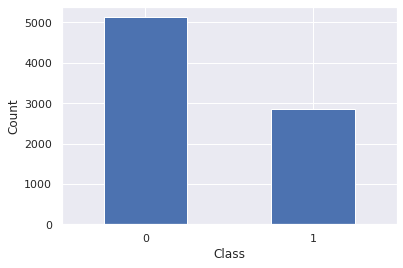

In [13]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots

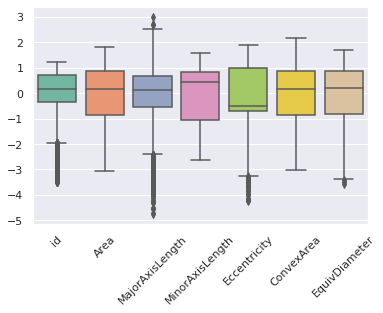

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

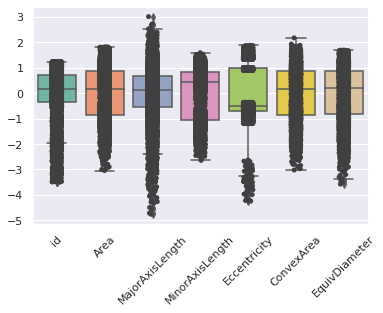

In [15]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Five Number Summary

In [16]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter
count,7.994000e+03,7.994000e+03,7.994000e+03,7.994000e+03,7.994000e+03,7.994000e+03,7.994000e+03
mean,1.672001e-16,7.884750e-16,-1.783442e-15,9.810072e-16,4.596843e-15,-2.215294e-15,5.374318e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.495252e+00,-3.045215e+00,-4.765226e+00,-2.642808e+00,-4.244337e+00,-3.022446e+00,-3.574623e+00
25%,-3.512182e-01,-8.560993e-01,-5.489812e-01,-1.046783e+00,-7.167314e-01,-8.554676e-01,-8.246601e-01
50%,1.794205e-01,1.504243e-01,1.460935e-01,4.573260e-01,-4.864530e-01,1.490687e-01,1.954417e-01
75%,7.100591e-01,8.718434e-01,6.896653e-01,8.407730e-01,9.834149e-01,8.744648e-01,8.682243e-01
max,1.238045e+00,1.822306e+00,3.015883e+00,1.594645e+00,1.888106e+00,2.179240e+00,1.696031e+00


Pair Plot

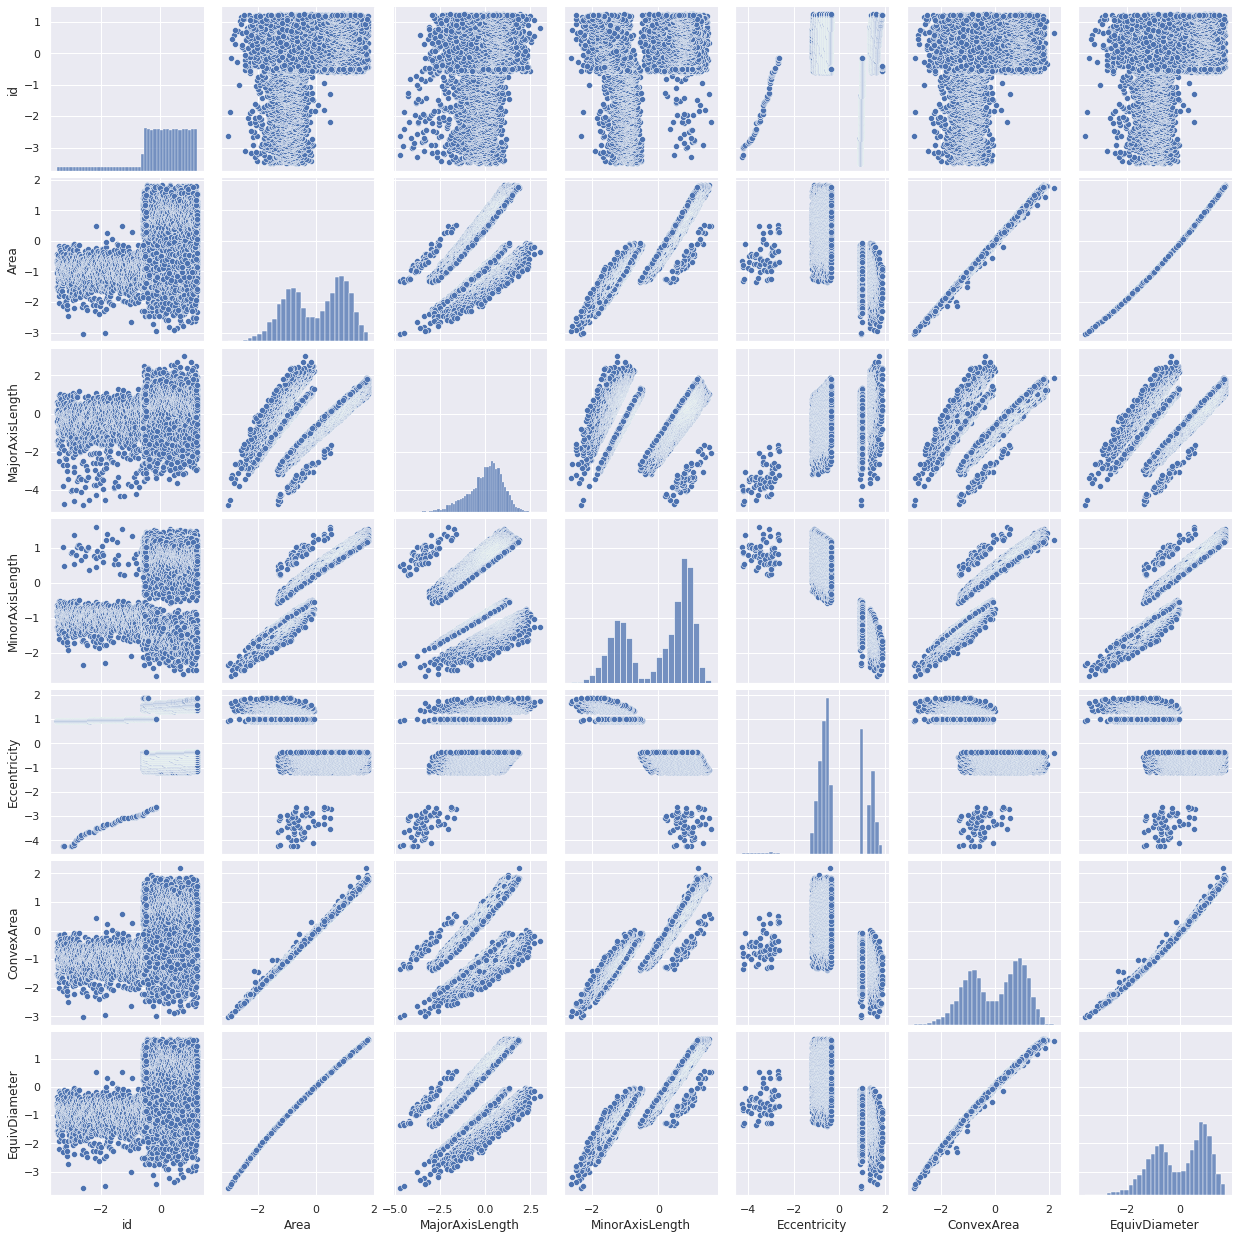

In [17]:
sns.pairplot(df)

Covariance

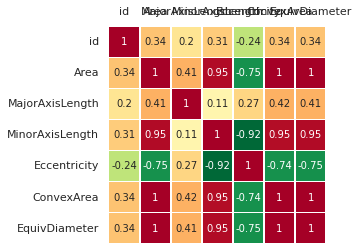

In [18]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

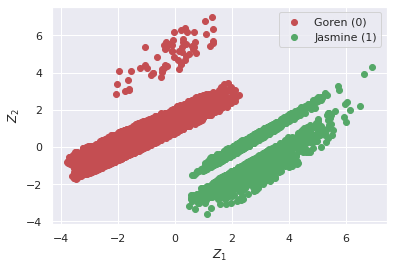

In [19]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Goren)->0,  2(Jasmine)->1, 3(Canadian)->2
idx_Goren = np.where(y == 0)
idx_Jasmine = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='r', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='g', label='Jasmine (1)')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

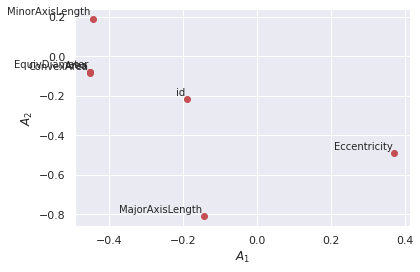

In [20]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


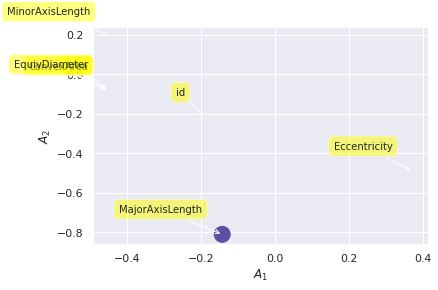

In [21]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

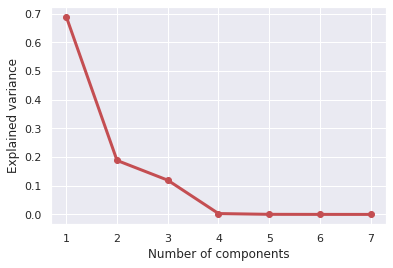

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

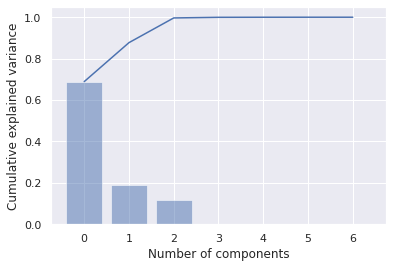

In [23]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [24]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (68.9%)',
 '1': 'PC 2 (18.8%)',
 '2': 'PC 3 (11.9%)',
 '3': 'PC 4 (0.3%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)'}

### **Biplot**

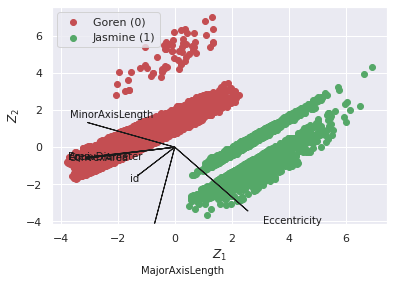

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='r', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='g', label='Jasmine (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')